# *Problem of Extinction*

### We want to figure out the probability of extinction for a family

### We start in generation 0 with one male parent

### The probability of having 0, 1, 2, 3, ..., male children are equal to $p_{1}$, $p_{2}$, $p_{3}$, ...

### If there are $k$ male children in the first generation, then each male child will have $X_{1, i}$ male children of his own and the resulting total number of male offspring from that generation is equal to $X_{1, 1} + X_{1, 2} + ... + X_{1, k}$

## Example

### Assume that $p_{0} = \frac{1}{2}$, $p_{1} = \frac{1}{4}$ and $p_{2} = \frac{1}{4}$

### Then, the following tree diagram describes the population growth

![](images/branching-table-1.PNG)

### We want to zero-in on the probability that a family will die out

## Let $d_{m}$ be the probability that a family dies out by the $m$th generation

## $\implies d_{0} = 0$

## From our example, $d_{1} = 1/2$, $d_{2} = 1/2 + 1/8 + 1/16 = 11/16$

### As we can see, we need to add the probability from previous generations i.e. $d_{1} \leq d_{2} \leq ...$

### So, as $n\rightarrow \infty$, the values $d_{n} \rightarrow d$ where $0\leq d \leq 1$

### This value $d$ is what we want to solve for

### For the first step, we consider all possible offspring in the first generation

### Then, for each case, we know that if the family dies out, it occurs in the following $m-1$ generations

# $\implies d_{m} = p_{0} + p_{1}d_{m-1} + p_{2} \left (d_{m-1} \right )^{2}+ p_{3} \left (d_{m-1} \right )^{3}+...$

### Note: the reason why we each $d_{m-1}$ term is of increasing power is because if we have offspring, the probability of the family dying off is $d_{m-1}$. However, if we have two offspring, both have to die off in $m-1$ generations which has probability $d_{m-1}^{2}$, etc.

### If we let $z = d_{m-1}$, then $d_{m} = p_{0}z^{0} + p_{1}z^{1} + p_{2}z^{2}+... = h(z)$

### i.e. we represent our probability $d_{m}$ with an ordinary generating function $h(z) \implies d_{m} = h(d_{m-1})$

### Now, since $d_{m}\rightarrow d$, we know for very very large $n$, $d_{m} \approx d_{m-1} \implies d = h(d)$

### $\implies d = p_{0}d^{0} + p_{1}d^{1} + p_{2}d^{2}+...$

### One possible solution for this equation is $d=1$ since $p_{0}d^{0} + p_{1}d^{1} + p_{2}d^{2}+... = p_{0} + p_{1} + p_{2}+...$ and we know the probabilities for the possible number of offspring *must add up to zero*

### We want to figure out how many possible solutions there are for $d$ (i.e. how many values other than $d=1$) such that the equation above is satisfied

### We combine the three following facts:

### 1. $h(0) = p_{0}$

### 2. $h^{'}(z) = p_{1} + 2p_{2}z + ...$ which is always greater than zero

### 3. $h^{''}(z) = 2p_{2}(z) + 6p_{3}z + ...$ which is also always greater than zero

### Therefore $h(z)$ is always positive and is concave upwards

### To solve for the $d$ values that satisfy the equation, we need to look at where the plot of $y = h(x)$ intersects with the line $y = 1$

![](images/graphs1.PNG)

### As we can see from the plots above, the function can intersect the line at most twice, one of which being at $d=1$

### Since we know that $d$ is a probability, is cannot be greater than 1. In these cases, we know with certainty 1 that the process will die out

### We note that $h^{'}(1) = p_{1} + 2p_{2} + 3p_{3}+... = m$ which is simply the weighted average number of children in the first generation (i.e. the EXPECTED NUMBER OF OFFSPRING from a single parent)

### Looking at the three plots above, we can see that:

### a) The slope at 1 is greater than the slope of the line $\implies h^{'}(1)>1 \implies m>1$

### b) The slope at 1 is equal to the slope of the line $\implies h^{'}(1)=1 \implies m=1$

### c) The slope at 1 is less than the slope of the line $\implies h^{'}(1)<1 \implies m=1$

### In summary, when $d<1$, the expected number of offspring of a single parent is greater than 1

### Recall, we let $z = d_{m-1}$ to show that $d_{m} = p_{0} + p_{1}z + p_{2}z^{2} + ... = h(d_{m-1})$

### So $d_{1} = h(d_{0})$, $d_{2} = h(d_{1}) = h(h(d_{0}))$, ..., $d_{n} = h(d_{n-1}) = h^{n}(d_{0})$

![](images/chart1.PNG)

# Theorem 10.2

## Consider a branching process with ordinary generating function $h(z)$ for the number of offspring

## Let $d$ be the smallest root of the equation $z = h(z)$

## If the expected number of offspring $m$ by a single parent is $\leq 1$, then $d=1$ and we are certain that the process will die out

## If $m>1$, then $d<1$ and the probability that the process dies out is equal to $d$

______

### We often want to know the probability of the process dying out after $n$ generations

### Let $d_{n}$ be the probability of the process dying out by generation $n$

### Then, we know that $d_{1} = p_{0}$

### We also know that $d_{n} = h(d_{n-1})$

### We can use these two facts to iterate through and calculate our probabilities

## Example

### Let $p_{0} = 0.2$, $p_{1} = 0.5$ and $p_{2} = 0.3$

In [1]:
def h(z):
    return 0.2 + 0.5*z + 0.3*z**2

In [2]:
list_results = [0.2]

for i in range(11):
    d_minus_1 = list_results[i]
    d = h(d_minus_1)
    list_results.append(d)

In [3]:
list_results

[0.2,
 0.31200000000000006,
 0.3852032,
 0.437116051587072,
 0.4758791585600576,
 0.5058778713455774,
 0.5297126618879284,
 0.5490349821932826,
 0.5649493145982347,
 0.578224975718622,
 0.5894157246227513,
 0.5989311312411445]

### So, for this example, the probability of the family dying out in 12 generations is about 60%

### Let's simulate this as well

In [55]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5

In [12]:
def single_parent():
    rand = random.random()
    if rand <= 0.2:
        return 0
    elif rand <= 0.2 + 0.5:
        return 1
    else:
        return 2

In [25]:
def simulate_family():
    list_new_members = [1]
    new_members = single_parent()
    list_new_members.append(new_members)
    
    for i in range(11):
        this_round = 0
        for i in range(new_members):
            this_round += single_parent()
        new_members = this_round
        
        list_new_members.append(new_members)
    return list_new_members

In [37]:
list_results = []
for i in range(10000):
    val = simulate_family()[-1]
    list_results.append(val)

In [38]:
len([x for x in list_results if x==0])/10000.0

0.5992

_____

### For now, let's limit the number of possible offspring to 2

## $\implies h(z) = p_{0} + p_{1}z + p_{2}z^{2}$

### So, if $d = h(d) \implies d = p_{0} + p_{1}d + p_{2}d^{2}$

### This equation has solutions $d=1$ and $d=\frac{p_{0}}{p_{2}}$

### To show that $d = \frac{p_{0}}{p_{2}}$ is a solution: $p_{0} + p_{1}\frac{p_{0}}{p_{2}} + p_{2}(\frac{p_{0}}{p_{2}})^{2} = p_{0} + p_{1}\frac{p_{0}}{p_{2}} + \frac{p_{0}^{2}}{p_{2}}= p_{0}\left ( \frac{p_{2} + p_{2} + p_{0}}{p_{2}} \right ) = \frac{p_{0}}{p_{2}}$

### With a maximum of 2 offspring, the expected number of offspring is equal to $m = p{1} + 2p_{2}$

### If we swap out $p_{1}$ with $1 - p_{0} - p_{2} \implies m = 1 - p_{0} - p_{2}+ 2p_{2} = 1 - p_{0} + p_{2}$

### Recall the condition that we need $m>1$ for $d<1$ i.e. for the death of the process to not be guaranteed

### This requires that $-p_{0} + p_{2} > 0 \implies p_{2} > p_{0}$

### Therefore, for the process to survive with non-zero probability, the probability of 2 offspring must be higher than the probability of no offspring

______

## Example

### The probability distribution for a single Japanese family is given by the following table:

![](images/japanese-family-table.PNG)

### This means that 

$m = 0.2584+0.2360\cdot2+0.1593\cdot3+0.0828\cdot4+0.0357\cdot5+0.0133\cdot6+0.0042\cdot7+0.0011\cdot8+0.002\cdot9 = 1.837$

### We can approximate $d$ by calculating $d_{1000}$

In [39]:
list_p_values = [0.2092,0.2584,0.2360,0.1593,0.0828,0.0357,0.0133,0.0042,0.0011,0.0002]

In [53]:
d = list_p_values[0]
for j in range(1000):
    new_d = 0
    for i, val in enumerate(list_p_values):
        new_d += val * (d**i)
    d = new_d

d

0.32432603489027545

### So the probability of this family not dying off is only $\approx 0.324$

### Let's plot its convergence

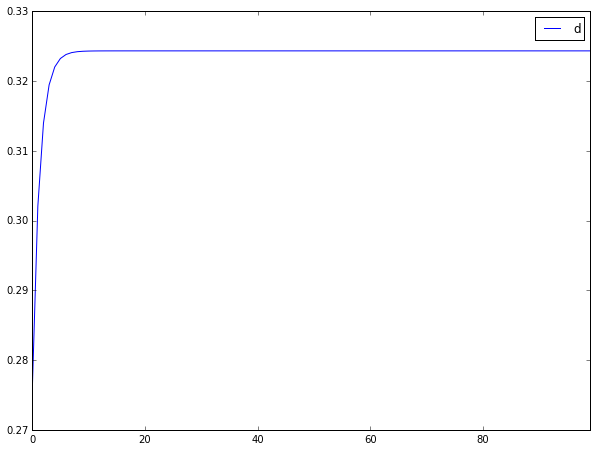

In [60]:
df = pd.DataFrame(columns = ['d'])

d = list_p_values[0]
for j in range(100):
    new_d = 0
    for i, val in enumerate(list_p_values):
        new_d += val * (d**i)
    d = new_d
    df.loc[j] = d

df.plot()

_____

# *Distribution of Offspring*

### So far, we've only thought about the probability of extinction

## Now, we want to consider the distribution of offspring in generation $n$, denoted $Z_{n}$

### We'll see that this distribution is hard to derive (except in special cases)

### However, we can describe $Z_{n}$ as $n\rightarrow \infty$

## Recall:

## $\mu_{n} = E(X^{n}) = g^{(n)}(0)$

## $g(t) = \sum p(x_{i})e^{(x_{i})t}$ and $h(z) = \sum p(x_{i})z^{(x_{i})}$

### $\implies E(z^{X}) = p(X=0)z^{0} + p(X+1)z^{1}+... = h(z)$

### Let $S_{n} = X_{1} + X_{2} + ... + X^{n}$ where each $X_{j}$ has the same generating function $k(z) =p_{0} + p_{1}z + p_{2}z^{2} + ...$

### Let $k_{n}$ be the generating function for $S_{n}$

### We learned in [10.1](../10.1-generating-functions-for-discrete-distributions/summary-of-chapter.ipynb) that $h_{n}(z) = \left ( h(z)\right )^{n}$

### $\implies k_{n}(z) = \left ( k(z) \right )^{n}$